<a href="https://colab.research.google.com/github/precymichel/netflix_mp/blob/main/Netflix_movie_analysis_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import io
df=pd.read_csv(io.BytesIO(uploaded['netflix_titles.csv']))

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
# a categorical column, replace 'your_categorical_column' with an actual column name
if 'type' in df.columns:
    print("\nUnique values in 'type' column:")
    print(df['type'].unique())

    print("\nValue counts for 'type' column:")
    print(df['type'].value_counts())


Unique values in 'type' column:
['Movie' 'TV Show']

Value counts for 'type' column:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [ ]:

print("\nValue counts for 'country':")
print(df['country'].value_counts().head(10)) # Show top countries



Value counts for 'country':
country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


In [ ]:
# Select a single column
titles = df['title']
print("\nTitles column:")
print(titles.head())

# Select multiple columns
selected_columns = df[['title', 'release_year', 'rating']]
print("\nSelected columns (title, release_year, rating):")
print(selected_columns.head())


Titles column:
0     Dick Johnson Is Dead
1            Blood & Water
2                Ganglands
3    Jailbirds New Orleans
4             Kota Factory
Name: title, dtype: object

Selected columns (title, release_year, rating):
                   title  release_year rating
0   Dick Johnson Is Dead          2020  PG-13
1          Blood & Water          2021  TV-MA
2              Ganglands          2021  TV-MA
3  Jailbirds New Orleans          2021  TV-MA
4           Kota Factory          2021  TV-MA


In [ ]:
# Filter for movies released after 2015
recent_movies = df[df['release_year'] > 2015]
print("\nMovies released after 2015:")
print(recent_movies.head())

# Filter for content with a specific rating (e.g., 'TV-MA')
tv_ma_content = df[df['rating'] == 'TV-MA']
print("\nContent with 'TV-MA' rating:")
print(tv_ma_content.head())


Movies released after 2015:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   



Value counts for 'release_year':
release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
Name: count, dtype: int64


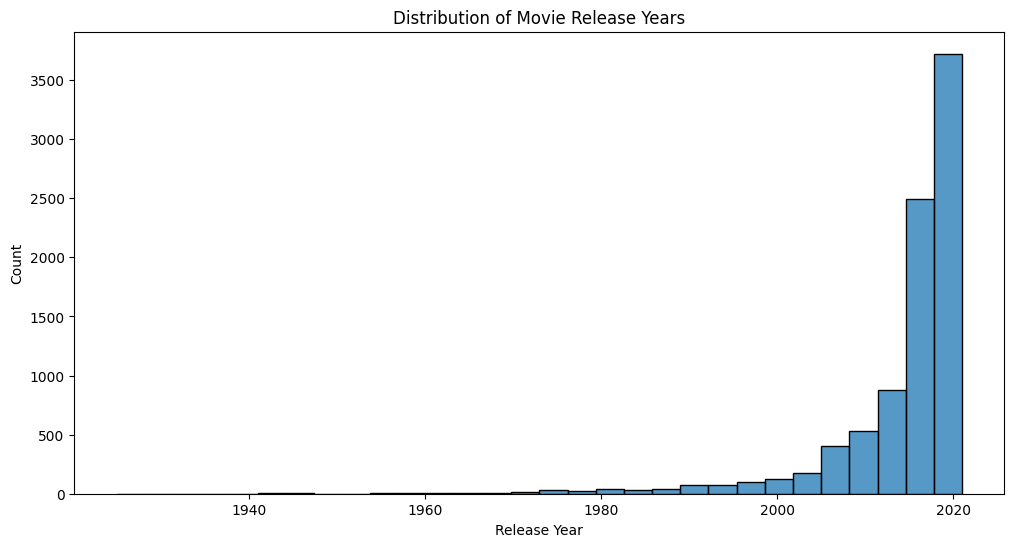

In [ ]:
 #Analyze 'release_year'
print("\nValue counts for 'release_year':")
print(df['release_year'].value_counts().head()) # Show top years

# Visualize release year distribution (e.g., using a histogram or bar plot)
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='release_year', bins=30) # Adjust bins as needed
plt.title('Distribution of Movie Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

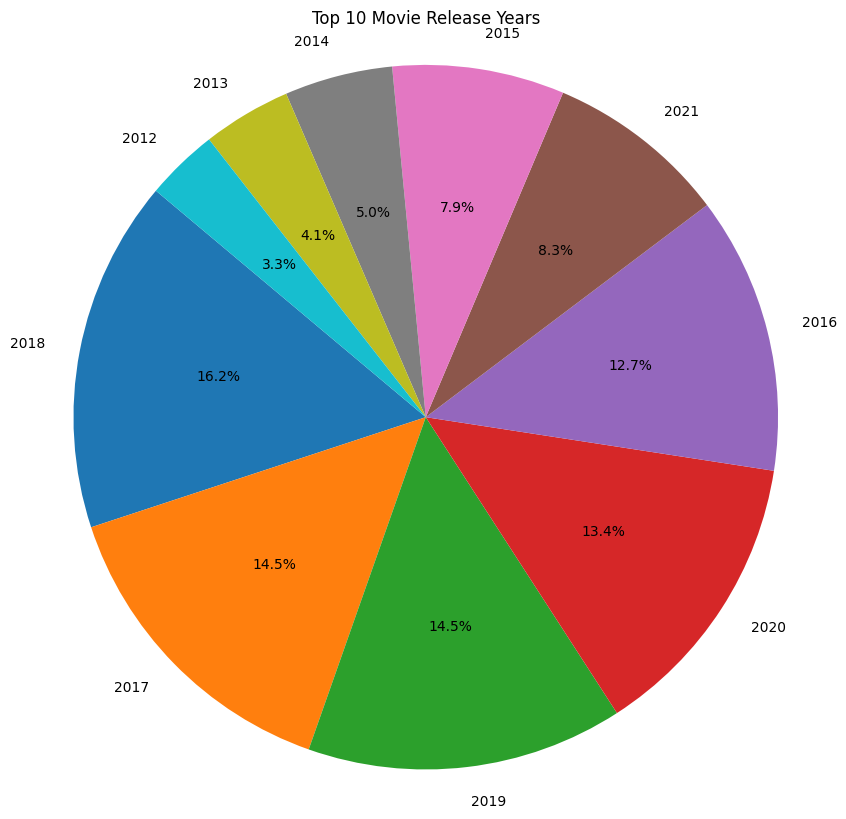

In [ ]:
# Count the occurrences of each release year
release_year_counts = df['release_year'].value_counts()

# Select a reasonable number of top years for the pie chart
# (Pie charts with too many slices can be difficult to read)
top_n = 10  # You can adjust this number
top_years = release_year_counts.head(top_n)

# Create the pie chart
plt.figure(figsize=(10, 10)) # Adjust figure size as needed
plt.pie(top_years, labels=top_years.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Top {top_n} Movie Release Years')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

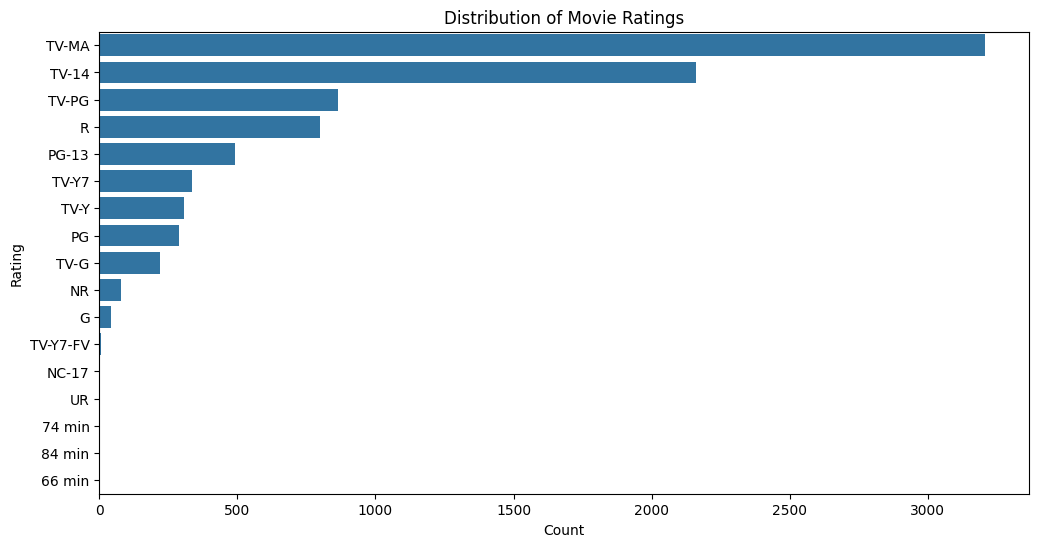

In [ ]:
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(12, 6)) # Adjust figure size as needed
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index) # Using countplot for ease
plt.title('Distribution of Movie Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

In [ ]:
# Assuming you have a 'country' column in your DataFrame df

# Count the occurrences of each country
country_counts = df['country'].value_counts()

# Get the country with the highest count
most_movies_country = country_counts.index[0]
number_of_movies = country_counts.iloc[0]

print(f"The country with the most movies is: {most_movies_country}")
print(f"Number of movies: {number_of_movies}")

The country with the most movies is: United States
Number of movies: 2818



Value counts for 'type':
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


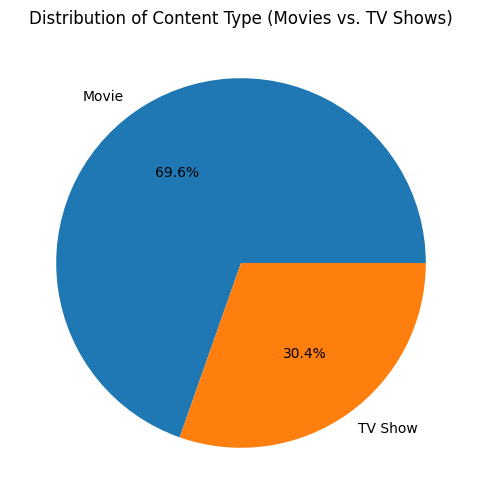

In [ ]:
# Analyze 'type' (if you have it, e.g., 'Movie' or 'TV Show')
if 'type' in df.columns:
    print("\nValue counts for 'type':")
    print(df['type'].value_counts())
    plt.figure(figsize=(6, 6))
    df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Distribution of Content Type (Movies vs. TV Shows)')
    plt.ylabel('') # Remove default y-label for pie chart
    plt.show()


In [ ]:
#  Analyze 'country'
print("\nValue counts for 'country':")
print(df['country'].value_counts().head(10)) # Show top countries


Value counts for 'country':
country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


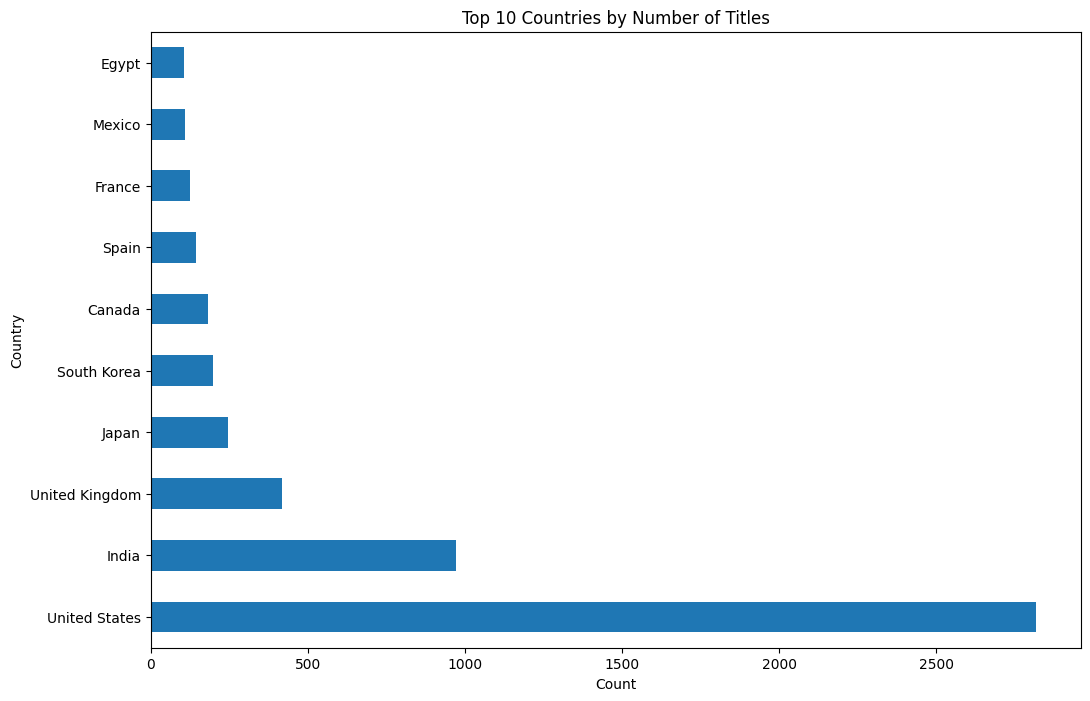

In [ ]:
 #Visualize top countries (can be complex if many countries)
 plt.figure(figsize=(12, 8))
 df['country'].value_counts().head(10).plot(kind='barh')
 plt.title('Top 10 Countries by Number of Titles')
 plt.xlabel('Count')
 plt.ylabel('Country')
 plt.show()

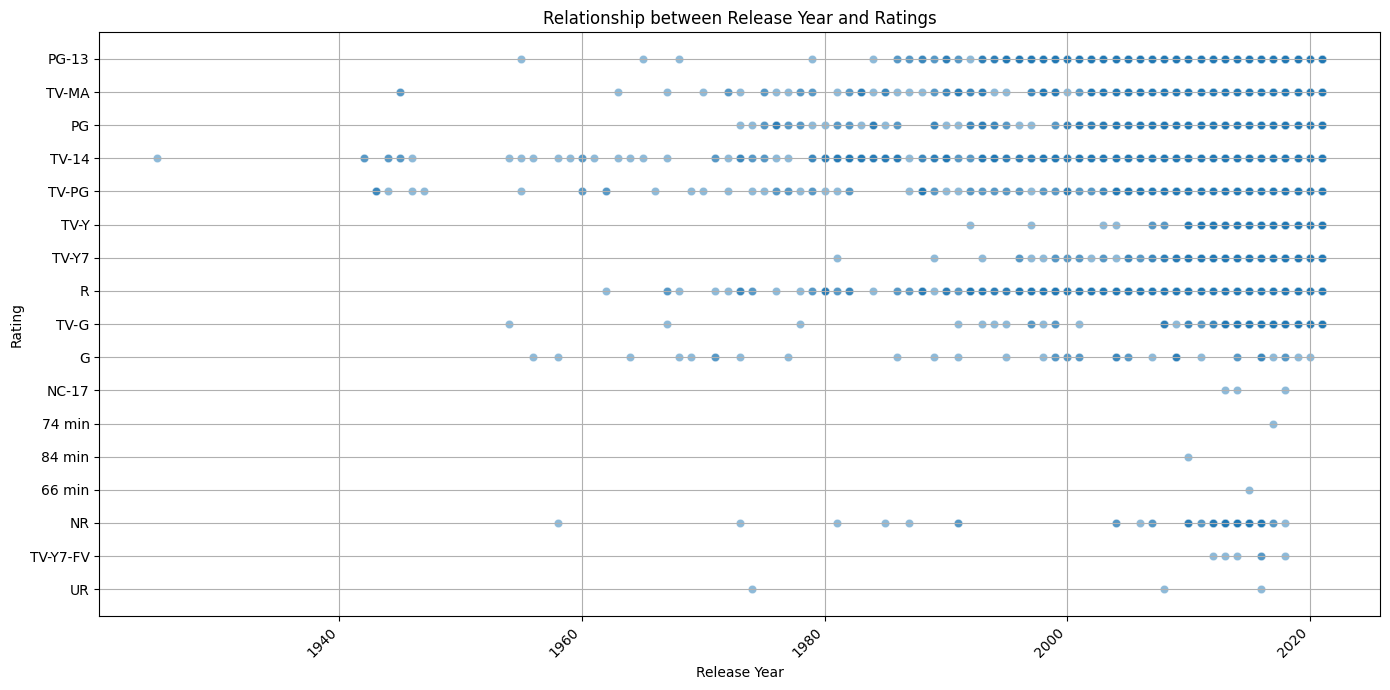

In [ ]:
# relation between 'release_year' and 'rating'
if 'release_year' in df.columns and 'rating' in df.columns:

    # Create a scatter plot
    plt.figure(figsize=(14, 7)) # Adjust figure size as needed
    sns.scatterplot(data=df, x='release_year', y='rating', alpha=0.5) # alpha controls transparency of points
    plt.title('Relationship between Release Year and Ratings')
    plt.xlabel('Release Year')
    plt.ylabel('Rating')
    plt.grid(True) # Add a grid for better readability

    # Rotate x-axis labels if they overlap
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()
else:
    print("The 'release_year' or 'rating' column does not exist in the DataFrame.")

In [ ]:
if 'duration' in df.columns:
    # Assuming 'duration' is in minutes for movies and seasons for TV shows
    # You might need to handle different units or split by 'type'

    # Example for movies (assuming 'duration' is in minutes and 'type' exists)
    movies_df = df[df['type'] == 'Movie']
    if not movies_df.empty:
        # Convert 'duration' to numeric, handling potential errors
        movies_df['duration_numeric'] = pd.to_numeric(movies_df['duration'].str.replace(' min', ''), errors='coerce')
        average_movie_duration = movies_df['duration_numeric'].mean()
        print(f"\nAverage Movie Duration: {average_movie_duration:.2f} minutes")

    # Example for TV shows (assuming 'duration' is in seasons and 'type' exists)
    tv_shows_df = df[df['type'] == 'TV Show']
    if not tv_shows_df.empty:
         # Convert 'duration' to numeric, handling potential errors
        tv_shows_df['duration_numeric'] = pd.to_numeric(tv_shows_df['duration'].str.replace(' Season', '').str.replace(' Seasons', ''), errors='coerce')
        average_tv_show_seasons = tv_shows_df['duration_numeric'].mean()
        print(f"\nAverage TV Show Seasons: {average_tv_show_seasons:.2f}")


Average Movie Duration: 99.58 minutes

Average TV Show Seasons: 1.00


<ipython-input-40-78fb0502c61a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['duration_numeric'] = pd.to_numeric(movies_df['duration'].str.replace(' min', ''), errors='coerce')
<ipython-input-40-78fb0502c61a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows_df['duration_numeric'] = pd.to_numeric(tv_shows_df['duration'].str.replace(' Season', '').str.replace(' Seasons', ''), errors='coerce')



Top 10 Genres:
listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


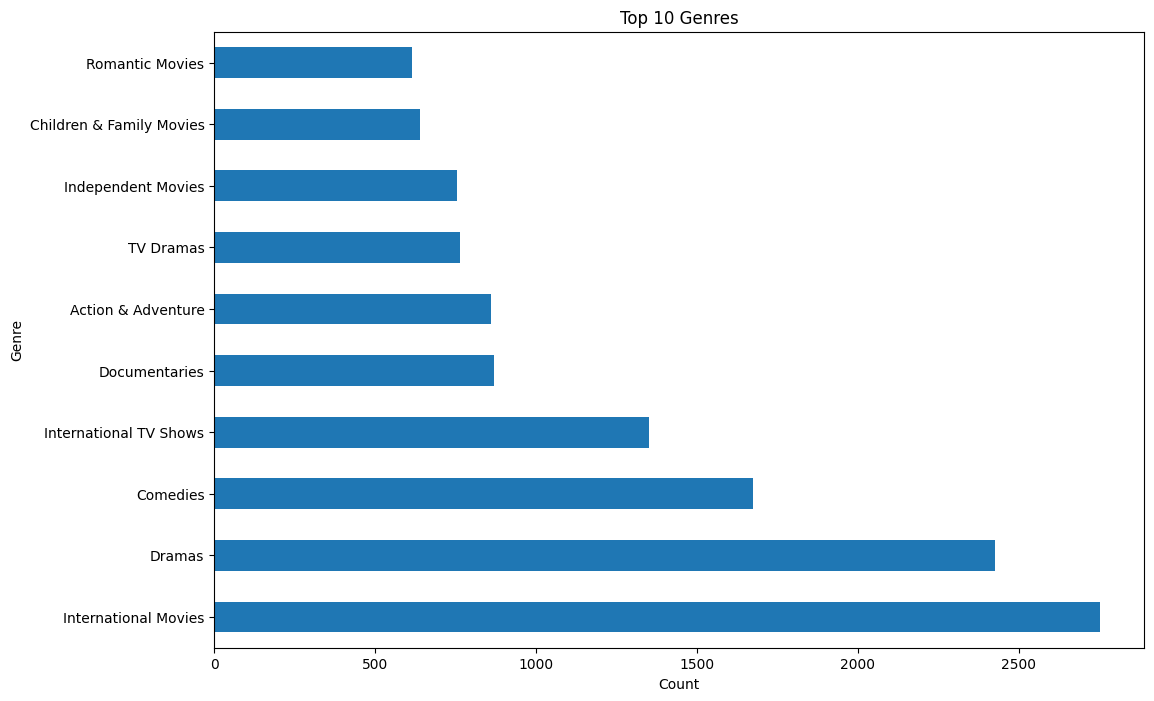

In [ ]:
if 'listed_in' in df.columns:
    # Split genres and count occurrences
    all_genres = df['listed_in'].str.split(', ').explode()
    genre_counts = all_genres.value_counts()

    print("\nTop 10 Genres:")
    print(genre_counts.head(10))

    plt.figure(figsize=(12, 8))
    genre_counts.head(10).plot(kind='barh')
    plt.title('Top 10 Genres')
    plt.xlabel('Count')
    plt.ylabel('Genre')
    plt.show()


Top 10 Directors:
director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64


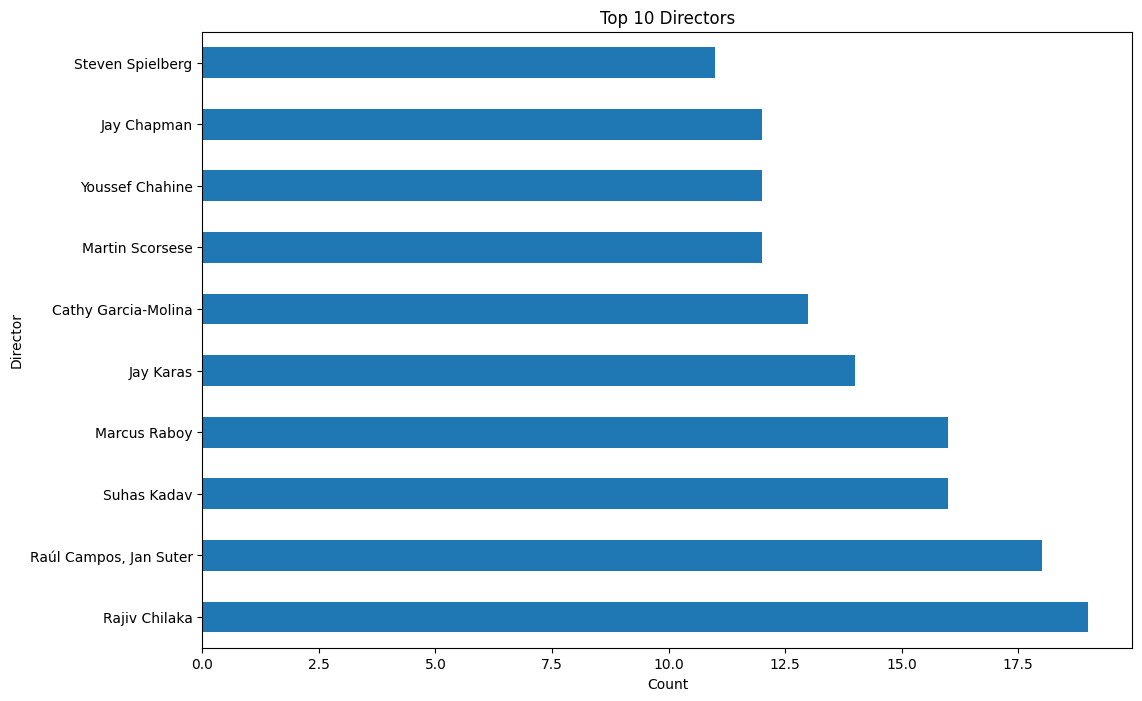


Top 10 Cast Members:
cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Takahiro Sakurai    32
Naseeruddin Shah    32
Rupa Bhimani        31
Om Puri             30
Akshay Kumar        30
Yuki Kaji           29
Amitabh Bachchan    28
Name: count, dtype: int64


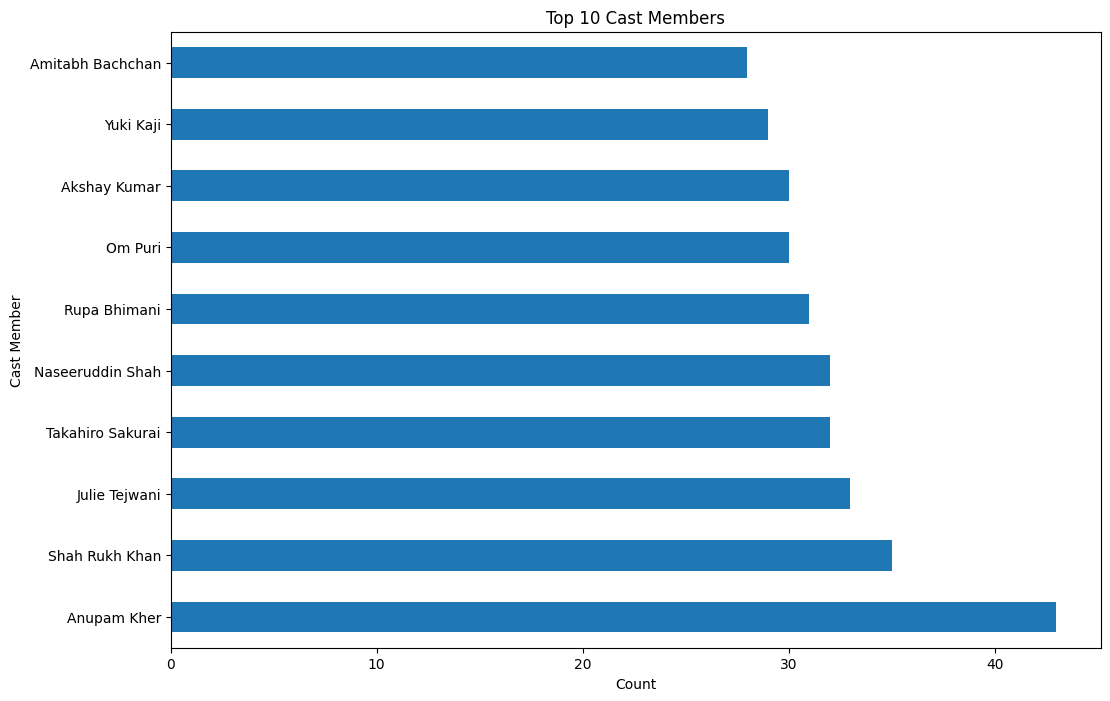

In [ ]:
if 'director' in df.columns:
    director_counts = df['director'].value_counts().head(10)
    print("\nTop 10 Directors:")
    print(director_counts)

    plt.figure(figsize=(12, 8))
    director_counts.plot(kind='barh')
    plt.title('Top 10 Directors')
    plt.xlabel('Count')
    plt.ylabel('Director')
    plt.show()

if 'cast' in df.columns:
    # This can be more complex as cast members are listed in a string
    # You would need to split the string and count each individual actor
    all_cast = df['cast'].str.split(', ').explode()
    cast_counts = all_cast.value_counts().head(10)
    print("\nTop 10 Cast Members:")
    print(cast_counts)

    plt.figure(figsize=(12, 8))
    cast_counts.plot(kind='barh')
    plt.title('Top 10 Cast Members')
    plt.xlabel('Count')
    plt.ylabel('Cast Member')
    plt.show()

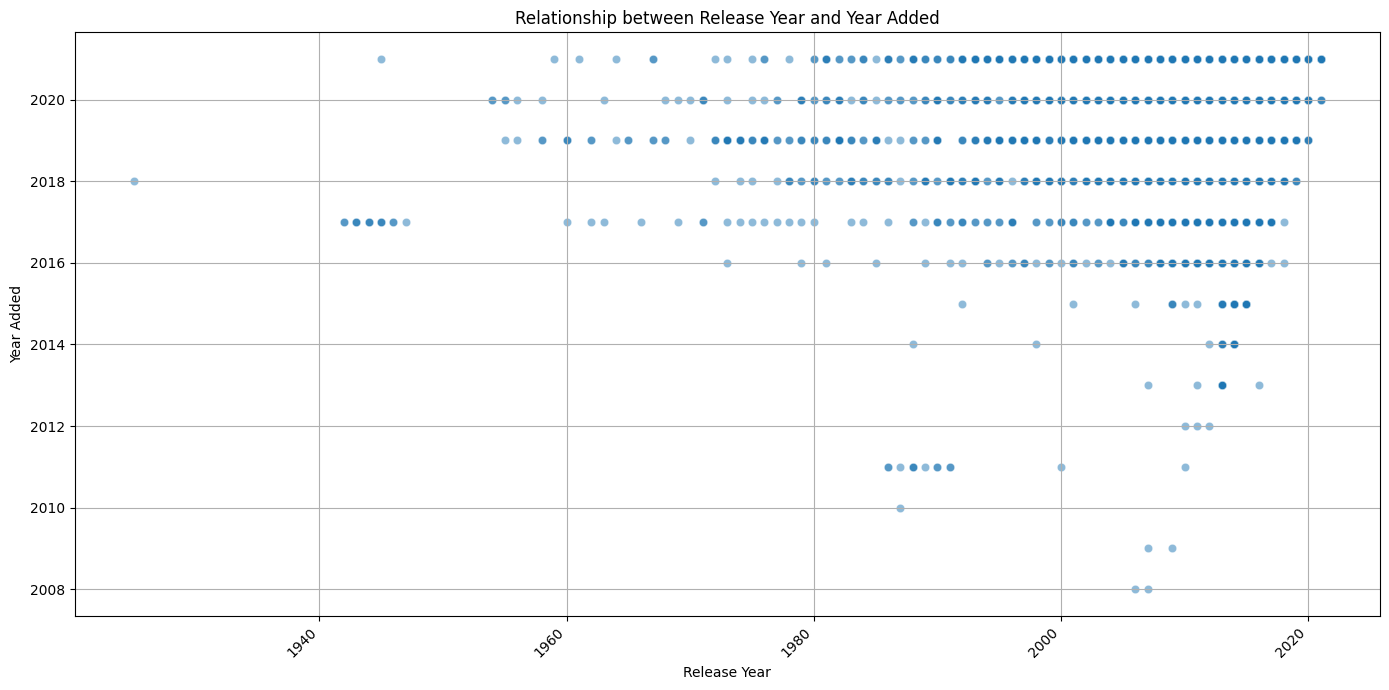

In [ ]:


# Assuming 'date_added' and 'release_year' columns exist
if 'date_added' in df.columns and 'release_year' in df.columns:

    # Convert 'date_added' to datetime objects
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

    # Extract the year from 'date_added'
    df['year_added'] = df['date_added'].dt.year

    # Drop rows where 'year_added' or 'release_year' are missing after conversion
    df_cleaned = df.dropna(subset=['year_added', 'release_year']).copy()

    # Ensure year columns are integers
    df_cleaned['year_added'] = df_cleaned['year_added'].astype(int)
    df_cleaned['release_year'] = df_cleaned['release_year'].astype(int)


    # Create the scatter plot
    plt.figure(figsize=(14, 7)) # Adjust figure size as needed
    sns.scatterplot(data=df_cleaned, x='release_year', y='year_added', alpha=0.5) # alpha controls transparency of points
    plt.title('Relationship between Release Year and Year Added')
    plt.xlabel('Release Year')
    plt.ylabel('Year Added')
    plt.grid(True) # Add a grid for better readability

    # Rotate x-axis labels if they overlap
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

else:
    print("The 'date_added' or 'release_year' column does not exist in the DataFrame.")